In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Optional: Set plot styles for better readability
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")


In [3]:
file_path = r'C:\Users\hp\Desktop\Projects\KAIM\env\data\sierraleone-bumbuna.csv'

df = pd.read_csv(file_path, parse_dates=['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [5]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


In [6]:
missing = df.isnull().sum()
print(missing)
#only missing comment

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
#clean data
df.fillna({"Comments": ""}, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [8]:
#remove anomalies
df = df[df['GHI'] > 0]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 263829 entries, 396 to 525266
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      263829 non-null  datetime64[ns]
 1   GHI            263829 non-null  float64       
 2   DNI            263829 non-null  float64       
 3   DHI            263829 non-null  float64       
 4   ModA           263829 non-null  float64       
 5   ModB           263829 non-null  float64       
 6   Tamb           263829 non-null  float64       
 7   RH             263829 non-null  float64       
 8   WS             263829 non-null  float64       
 9   WSgust         263829 non-null  float64       
 10  WSstdev        263829 non-null  float64       
 11  WD             263829 non-null  float64       
 12  WDstdev        263829 non-null  float64       
 13  BP             263829 non-null  int64         
 14  Cleaning       263829 non-null  int64         
 15  Pre

In [9]:
df['z_GHI'] = zscore(df['GHI'])
outliers = df[df['z_GHI'].abs() > 3]
outliers

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,z_GHI
298859,2022-05-25 13:00:00,1337.0,922.0,420.0,1246.0,1218.0,28.7,76.2,1.7,2.4,0.4,269.5,20.4,1002,0,0.0,48.9,50.7,,3.050690
298860,2022-05-25 13:01:00,1347.0,922.0,429.4,1251.0,1227.0,28.9,76.6,2.2,2.9,0.6,248.2,18.4,1002,0,0.0,51.3,53.0,,3.083500
353512,2022-07-02 11:53:00,1333.0,719.3,639.9,1234.0,1212.0,29.0,71.9,0.3,1.9,0.5,302.5,12.8,1004,0,0.0,46.5,47.3,,3.037565
355030,2022-07-03 13:11:00,1322.0,858.0,481.8,1229.0,1208.0,29.8,72.9,3.2,4.1,0.6,204.5,10.5,1002,0,0.0,61.8,61.1,,3.001473
355031,2022-07-03 13:12:00,1350.0,868.0,498.6,1254.0,1231.0,29.9,71.2,3.5,4.4,0.7,199.8,8.9,1002,0,0.0,62.5,61.5,,3.093344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487467,2022-10-03 12:28:00,1377.0,929.0,459.0,1413.0,1384.0,31.8,65.1,1.3,2.4,0.8,139.6,14.7,1001,0,0.0,65.9,61.8,,3.181933
487468,2022-10-03 12:29:00,1381.0,922.0,467.7,1410.0,1379.0,32.0,63.6,1.6,2.1,0.4,117.6,14.7,1001,0,0.0,67.8,63.4,,3.195057
487515,2022-10-03 13:16:00,1394.0,912.0,504.3,1408.0,1380.0,31.4,66.9,1.4,2.4,0.7,213.2,12.3,1000,0,0.0,54.4,51.5,,3.237711
496155,2022-10-09 13:16:00,1351.0,861.0,516.1,1382.0,1354.0,31.1,69.8,2.5,3.1,0.5,226.4,26.7,1000,0,0.0,53.9,54.1,,3.096625


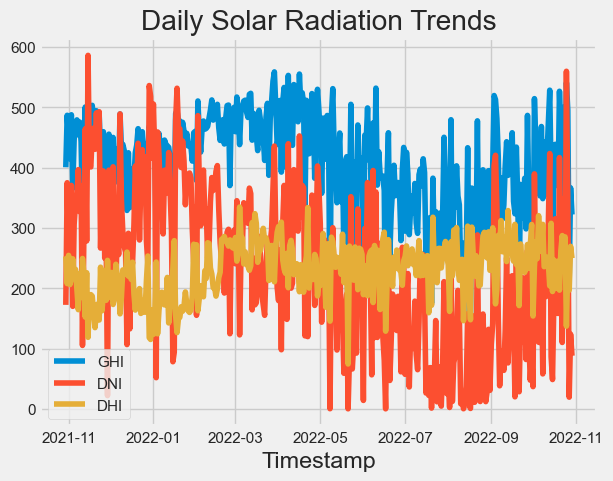

In [10]:
df.groupby(df['Timestamp'].dt.date)[['GHI', 'DNI', 'DHI']].mean().plot()
plt.title("Daily Solar Radiation Trends")
plt.show()

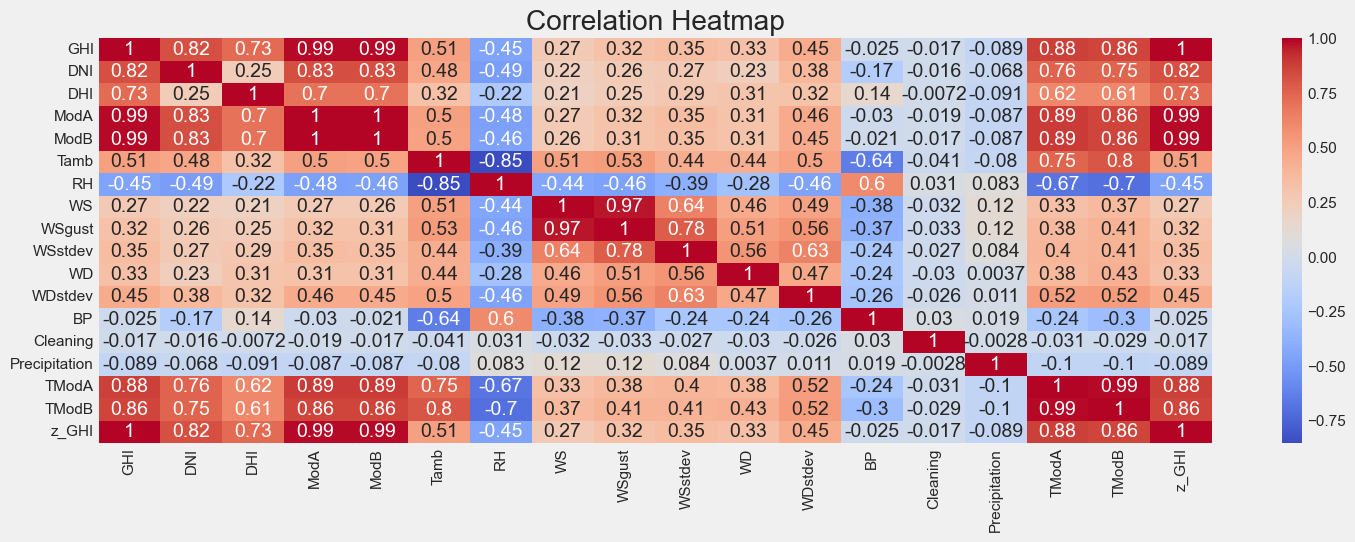

In [11]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

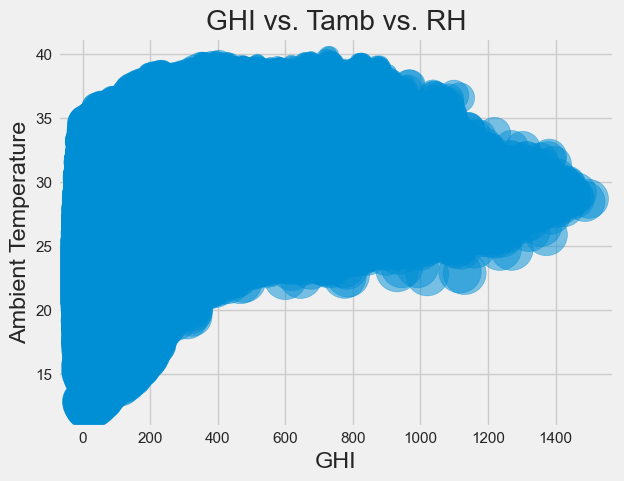

In [12]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Ambient Temperature")
plt.title("GHI vs. Tamb vs. RH")
plt.show()
